VisDrone
Convert Data annotations for Darknet implementation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.8 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
model = YOLO(model='yolo11n.pt')
# model = YOLO(model='')

In [ ]:
# results = model.train(data='VisDrone.yaml', pretrained=False, classes=[3], epochs=100, optimizer='SGD', lr0=0.001, weight_decay=0.005, plots=True)
results = model.train(data='coco.yaml', pretrained=True, epochs=50, optimizer='SGD', lr0=0.001, weight_decay=0.005, plots=True)

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.001, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=SGD, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tr

In [ ]:
from google.colab import files
files.download('/content/runs/detect/train/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO
# trained_model = YOLO('/content/drive/MyDrive/csi_5140/trained_models/best_yolov11_all.pt')
trained_model = YOLO("/content/runs/detect/train/weights/best.pt")

source = "/content/drive/MyDrive/VisDrone2019-DET-test-dev/images"
# source = "/content/datasets/VisDrone/images/test"
predictions = trained_model.predict(source, save=True)
for prediction in predictions:
  boxes = prediction.boxes  # Boxes object for bounding box outputs
  masks = prediction.masks  # Masks object for segmentation masks outputs
  keypoints = prediction.keypoints  # Keypoints object for pose outputs
  probs = prediction.probs  # Probs object for classification outputs
  obb = prediction.obb  # Oriented boxes object for OBB outputs
  # prediction.show()  # display to screen


WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/1610 /content/drive/MyDrive/VisDrone2019-DET-test-dev/images/0000006_00159_d_0000001.jpg: 384x640 18 cars, 5 trucks, 85.5ms
image 2/1610 /content/drive/MyDrive/VisDrone2019-DET-test-dev/images/0000006_00611_d_0000002.jpg: 384x640 1 person, 15 cars, 1 bus, 5 trucks, 12.9ms
image 3/1610 /content/drive/MyDrive/VisDrone2019-DET-test-dev/images/0000006_01111_d_0000003.jpg: 384x640 3 persons, 13 cars, 3 trucks, 10.2ms
image 4/1610 /content/drive/MyDr


Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage0_Conv_features.png... (16/16)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage1_Conv_features.png... (32/32)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage2_C3k2_features.png... (32/64)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage3_Conv_features.png... (32/64)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage4_C3k2_features.png... (32/128)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage5_Conv_features.png... (32/128)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage6_C3k2_features.png... (32/128)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage7_Conv_features.png... (32/256)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage8_C3k2_features.png... (32/256)
Saving /content/runs/detect/predict2/0000006_00159_d_0000001/stage9_SPPF_features.png... (32/256)
Saving /content/runs/de

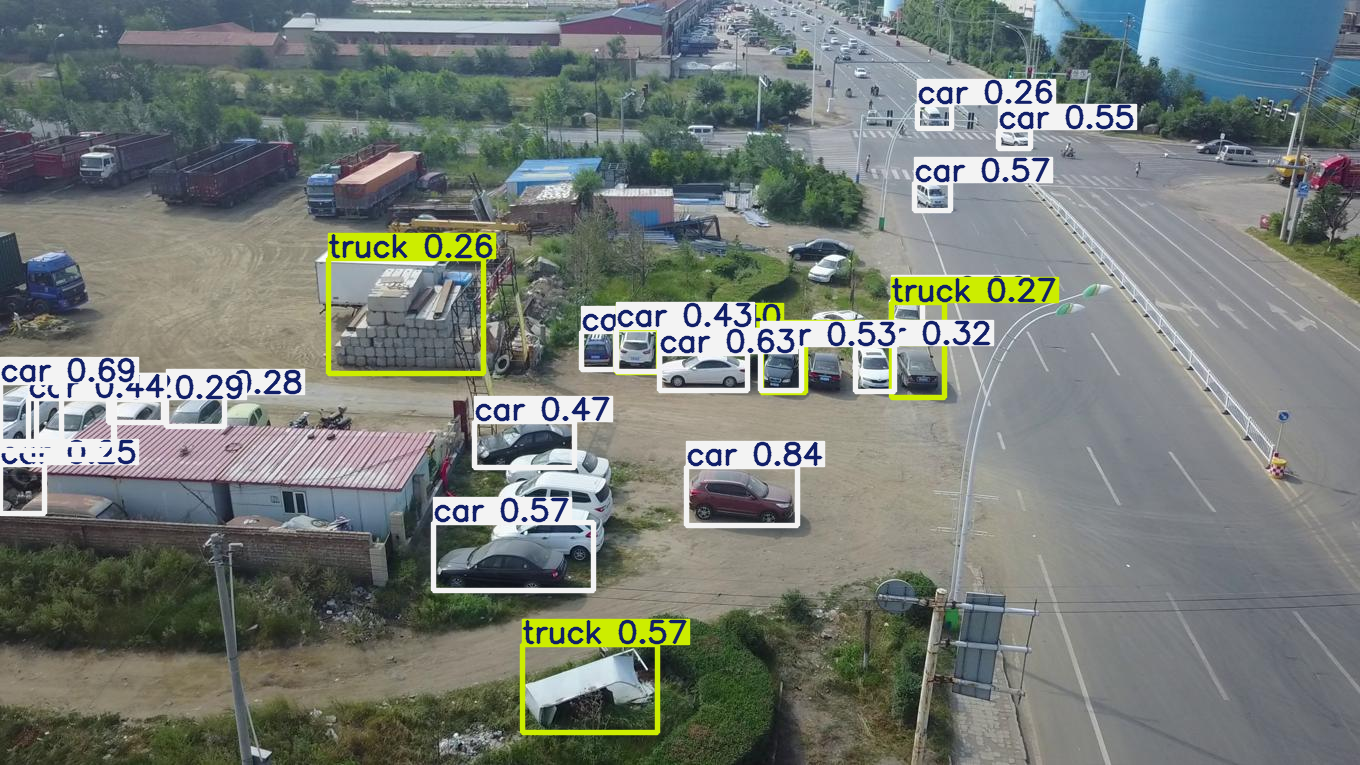

In [ ]:
# trained_model = YOLO('/content/drive/MyDrive/csi_5140/trained_models/best_yolov11_all.pt')
trained_model= YOLO('/content/runs/detect/train/weights/best.pt')
source = "/content/drive/MyDrive/VisDrone2019-DET-test-dev/images/0000006_00159_d_0000001.jpg"
predictions = trained_model.predict(source, save=True, visualize=True)
for prediction in predictions:
  boxes = prediction.boxes  # Boxes object for bounding box outputs
  masks = prediction.masks  # Masks object for segmentation masks outputs
  keypoints = prediction.keypoints  # Keypoints object for pose outputs
  probs = prediction.probs  # Probs object for classification outputs
  obb = prediction.obb  # Oriented boxes object for OBB outputs
  prediction.show()  # display to screen

In [ ]:
# model = YOLO("/content/drive/MyDrive/csi_5140/trained_models/best_yolov11_all.pt")
model = YOLO("/content/runs/detect/train/weights/best.pt")
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list containing mAP50-95 for each category

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2006.5±841.2 MB/s, size: 223.0 KB)
val: Scanning /content/datasets/coco/labels/val2017.cache... 4952 images, 48 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 5000/5000 5.9Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 313/313 7.3it/s 43.0s
                   all       5000      36335      0.646      0.491      0.536       0.38
                person       2693      10777      0.772      0.663      0.745      0.516
               bicycle        149        314      0.674      0.398      0.461      0.267
                   car        535       1918      0.678      0.525      0.582      0.372
            motorcycle        159        367       0.72      0.605      0.665      0.425
              airplane        

array([    0.51557,      0.2668,     0.37211,     0.42498,     0.66629,     0.62469,     0.66584,     0.30687,     0.21547,     0.21162,     0.62767,     0.59241,     0.42165,      0.2063,     0.27545,     0.67997,     0.62976,     0.57833,     0.49267,     0.51402,     0.64813,      0.7199,     0.66197,     0.69202,
           0.10479,     0.37903,    0.084198,     0.26934,     0.36069,     0.60972,     0.20239,     0.26358,     0.36975,      0.3999,     0.22014,     0.31542,      0.4638,      0.3345,     0.40477,     0.30076,     0.27055,      0.3523,      0.2737,     0.11881,    0.092649,     0.38426,      0.2147,     0.15439,
           0.34052,     0.28979,     0.19946,     0.16674,     0.33226,     0.51673,     0.40294,     0.34645,     0.25882,     0.45442,     0.23305,     0.45726,     0.30304,      0.6458,     0.53463,     0.57855,     0.55145,       0.177,     0.47158,     0.29562,       0.514,     0.37493,     0.39064,     0.35825,
           0.55705,     0.10281,     0.4591

In [ ]:
results = model.val(data="VisDrone.yaml", plots=True)
print(results.confusion_matrix.to_df())

In [ ]:
from google.colab import files
files.download('/content/runs/detect/val')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/runs/detect/val.zip /content/runs/detect/val

  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 9%)
  adding: content/runs/detect/val/BoxPR_curve.png (deflated 8%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 20%)
  adding: content/runs/detect/val/predictions.json (deflated 86%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 7%)
  adding: content/runs/detect/val/BoxP_curve.png (deflated 8%)
  adding: content/runs/detect/val/BoxR_curve.png (deflated 10%)
  adding: content/runs/detect/val/BoxF1_curve.png (deflated 10%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 9%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 21%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 7%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 6%)


In [ ]:
files.download('/content/runs/detect/val.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/runs/detect/train.zip /content/runs/detect/train

In [ ]:
files.download('/content/runs/detect/train.zip')